In [1]:
import matplotlib.pyplot as plt
import os
import sys
import warnings
from scipy.optimize import OptimizeWarning
import numpy as np

sys.path.append(os.path.join(os.path.dirname(
    os.path.abspath(''))))
import common.plots as plots
import potential_data
import fit

warnings.simplefilter("ignore", OptimizeWarning)
warnings.simplefilter("ignore", RuntimeWarning)

          smearing_step  r/a  copy  T     aV(r)       err  bin_size
beta HYP                                                           
6.0  0               30    1    20  1  0.418556  0.000134       112
     0               30    1    20  2  0.413376  0.000125       112
     0               30    1    20  3  0.411897  0.000124       112
     0               30    1    20  4  0.411396  0.000104       112
     0               30    1    20  5  0.411092  0.000186       112
...                 ...  ...   ... ..       ...       ...       ...
     1               30    8    20  3  0.527651  0.004321       112
     1               30    8    20  4  0.519889  0.005113       112
     1               30    8    20  5  0.512728  0.005880       112
     1               30    8    20  6  0.509490  0.007188       112
     1               30    8    20  7  0.510835  0.007647       112

[112 rows x 7 columns]
      HYP  r/a     T     aV(r)       err
beta                                    
6.0     0 

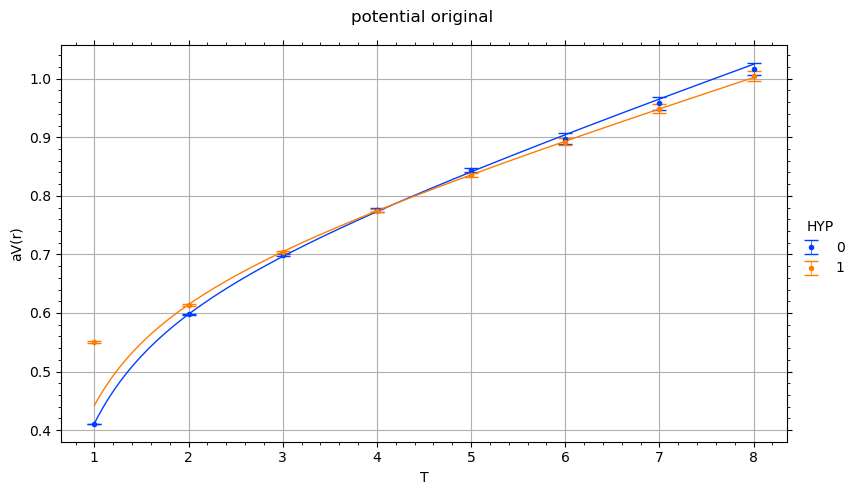

In [5]:
paths = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP0_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 0}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (112, 112)}}]
paths_HYP = [{'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP1_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 1}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (112, 112)}},
         {'path': '../../result/smearing/binning/potential/wilson_loop/fundamental/on-axis/su3/gluodynamics/16^4/beta6.0/HYP3_alpha=1_1_0.5_APE_alpha=0.6/potential_original.csv',
          'parameters': {'beta': 6.0, 'HYP': 3}, 'constraints': {'r/a': (1, 8), 'T': (1, 7), 'smearing_step': (30, 30), 'bin_size': (112, 112)}}]
df = potential_data.get_potantial_df(paths)
df_HYP = potential_data.get_potantial_df(paths_HYP)
df = df.groupby(df.index.names + ['r/a']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'HYP']).reset_index(level=-1, drop=True)
df_HYP = df_HYP.groupby(df_HYP.index.names + ['r/a']).apply(fit.potential_fit_T_range, 5).reset_index(level=['r/a', 'HYP']).reset_index(level=-1, drop=True)
print(df)
print(df_HYP)
df_fit = df.groupby(df.index.names + ['HYP']).apply(fit.make_fit_range, fit.func_cornell, 6, ['V0', 'alpha', 'sigma'], 'r/a', 'aV(r)', err_col='err').reset_index(level=-1, drop=True)
df_fit = df_fit.groupby(df_fit.index.names).apply(fit.average_fit_p_value, ['V0', 'alpha', 'sigma'], 'r/a').reset_index(level=-1, drop=True).reset_index(level=['HYP'])
df_curves = df_fit.groupby(df_fit.index.names + ['HYP']).apply(fit.make_fit_curve, fit.func_cornell, 'r/a', 'aV(r)', ['V0', 'alpha', 'sigma']).reset_index(level=-1, drop=True).reset_index(level=['HYP'])
V, V_err = fit.fit_curve_shift(df[df['HYP'] == 0], df_fit.loc[df_fit['HYP'] == 1, ['V0', 'alpha', 'sigma']].values[0], 'r/a', 'aV(r)', 'err', fit.func_cornell)
df.loc[df['HYP'] == 1, 'aV(r)'] = df.loc[df['HYP'] == 1, 'aV(r)'] + V
df.loc[df['HYP'] == 1, 'err'] = np.sqrt(df.loc[df['HYP'] == 1, 'err'] ** 2 + V_err ** 2)
df_curves.loc[df_curves['HYP'] == 1, 'aV(r)'] = df_curves.loc[df_curves['HYP'] == 1, 'aV(r)'] + V
image_path = f'../../images/potential/su3/gluodynamics/'
image_name = f'HYP_comparison'
plots.make_plot(df, 'r/a', 'aV(r)', 'HYP', 'T', 'aV(r)', 'potential original', image_path, f'potential_monopole', True, err='err', df_fits=df_curves)